<a href="https://colab.research.google.com/github/DT6A/Hands-On_Machine_Learning/blob/main/ML07_Dimensionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import make_moons

##PCA

In [ ]:
np.random.seed(4) 
m = 60 
w1, w2 = 0.1, 0.3 
noise = 0.1 

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5 
X = np.empty((m, 3)) 
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2 
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2 
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

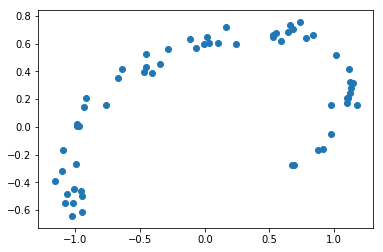

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1])

In [ ]:
X_centered = X - X.mean(axis=0)

U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [ ]:
c1, c2

(array([0.93636116, 0.29854881, 0.18465208]),
 array([-0.34027485,  0.90119108,  0.2684542 ]))

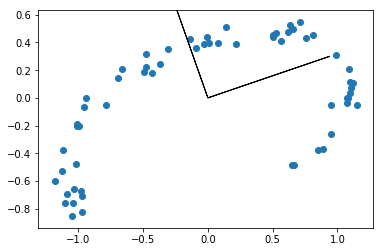

In [ ]:
plt.scatter(X_centered[:,0], X_centered[:,1])
plt.arrow(0, 0, c1[0], c1[1])
plt.arrow(0, 0, c2[0], c2[1])

$X_{d-proj} = XW_d$

In [ ]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

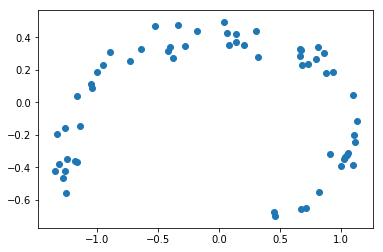

In [ ]:
plt.scatter(X2D[:, 0], X2D[:, 1])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [ ]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [ ]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [ ]:
from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784', version=1) 
mnist.target = mnist.target.astype(np.int64)

In [ ]:
from sklearn.model_selection import train_test_split 
X = mnist["data"] 
y = mnist["target"] 
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
d

154

In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

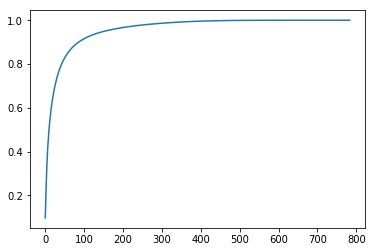

In [ ]:
plt.plot(cumsum)

In [ ]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

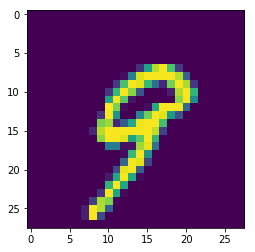

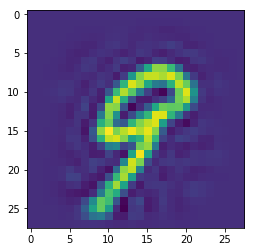

In [ ]:
plt.imshow(X_train[0].reshape(28, 28))
plt.show()
plt.imshow(X_recovered[0].reshape(28, 28))

$X_{recovered} = X_{d-proj}W_D^T$

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
  inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

In [ ]:
rnd_pca = PCA(n_components=154, svd_solver='randomized')
X_reduced = rnd_pca.fit_transform(X_train)

##Kernel PCA

In [ ]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)
pca = PCA(n_components=2)
sig_pca = KernelPCA(n_components=2, kernel='sigmoid', gamma=0.001)

In [ ]:
from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

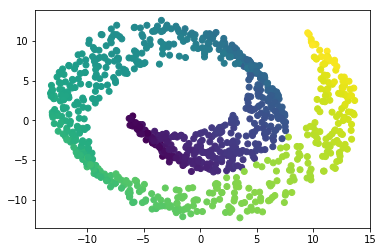

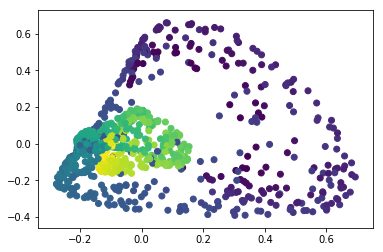

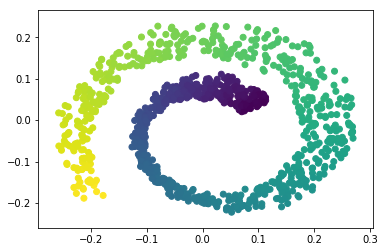

In [ ]:
for p in (pca, rbf_pca, sig_pca):
  X_red = p.fit_transform(X)
  plt.scatter(X_red[:, 0], X_red[:, 1], c=t)
  plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('kpca', KernelPCA(n_components=2)),
    ('log_reg', LogisticRegression())
])

param_grid = [{
    'kpca__gamma': np.linspace(0.03, 0.05, 10),
    'kpca__kernel': ['rbf', 'sigmoid']
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, t>6.9)

In [ ]:
grid_search.best_params_

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

In [ ]:
rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.0433, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.786308795766125

##LLE

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

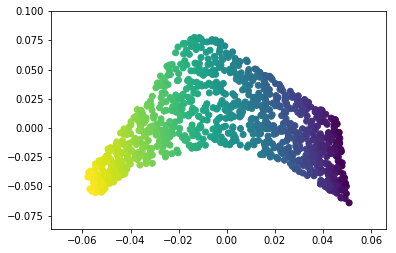

In [ ]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t)

###Step 1
$\hat{W} = argmin_{_{W}}\sum_{i=1}^m{(x^{i} - \sum_{j=1}^m{w_{i, j}x^{(j)}})^2}$

###Step 2
$Z$ - matrix of images of $X$ in d-dims

$\hat{Z} = argmin_{_{Z}}\sum_{i=1}^m{(z^{i} - \sum_{j=1}^m{\hat{w}_{i, j}z^{(j)}})^2}$

In [ ]:
X = mnist["data"] 
y = mnist["target"] 

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

for_clf = RandomForestClassifier(random_state=42)

In [ ]:
%%time

for_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 6.06 s, sys: 9.38 ms, total: 6.07 s
Wall time: 6.08 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, for_clf.predict(X_test))

0.9492

In [ ]:
%%time
pca = PCA(n_components=0.95)
X_red = pca.fit_transform(X_train)


CPU times: user 22.1 s, sys: 1 s, total: 23.1 s
Wall time: 12.2 s


In [ ]:
%%time
for_clf.fit(X_red, y_train)

CPU times: user 12.5 s, sys: 29 ms, total: 12.5 s
Wall time: 12.5 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
accuracy_score(y_test, for_clf.predict(pca.transform(X_test)))

0.9009

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_red = tsne.fit_transform(X_test, y_test)

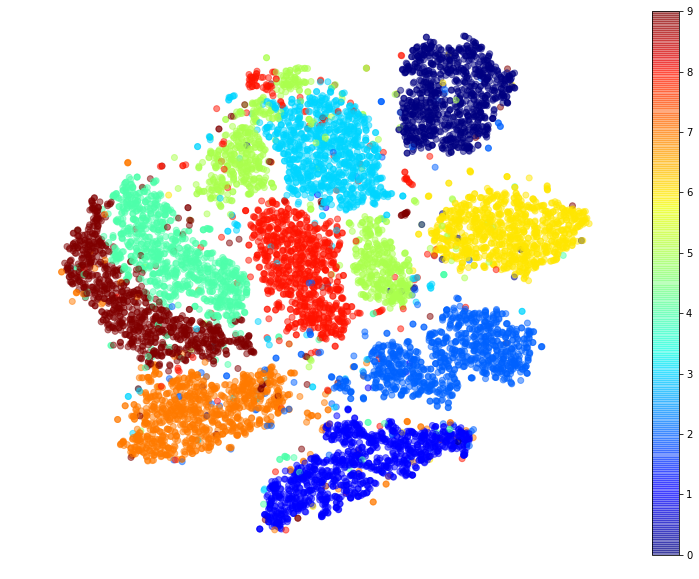

In [ ]:
plt.figure(figsize=(13,10))
plt.scatter(X_red[:, 0], X_red[:, 1], c=y_test, alpha=0.5, cmap="jet") 
plt.axis('off') 
plt.colorbar() 
plt.show()


In [ ]:
lle = LocallyLinearEmbedding(n_components=2)
X_red = lle.fit_transform(X[:2000], y[:2000])

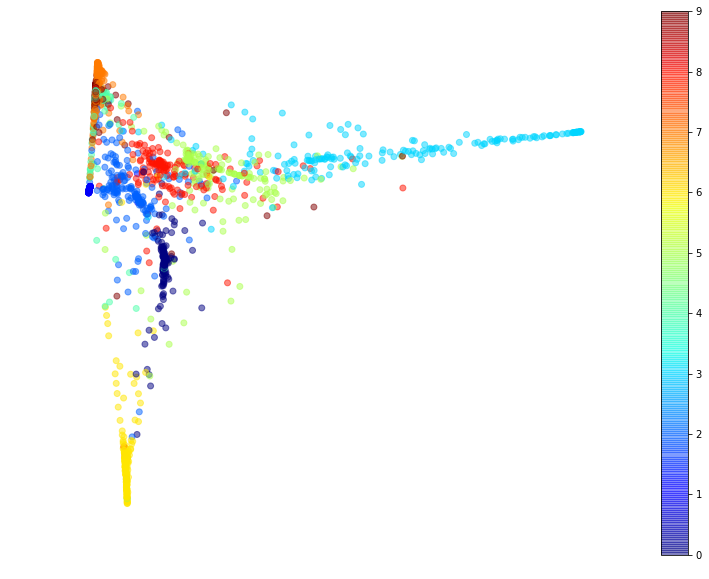

In [ ]:
plt.figure(figsize=(13,10))
plt.scatter(X_red[:, 0], X_red[:, 1], c=y[:2000], alpha=0.5, cmap="jet") 
plt.axis('off') 
plt.colorbar() 
plt.show()

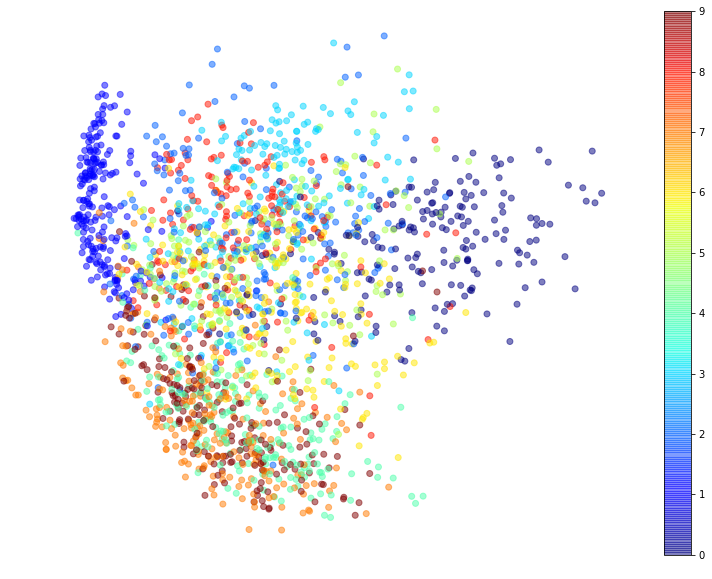

In [ ]:
pca = PCA(n_components=2)
X_red = pca.fit_transform(X[:2000], y[:2000])

plt.figure(figsize=(13,10))
plt.scatter(X_red[:, 0], X_red[:, 1], c=y[:2000], alpha=0.5, cmap="jet") 
plt.axis('off') 
plt.colorbar() 
plt.show()

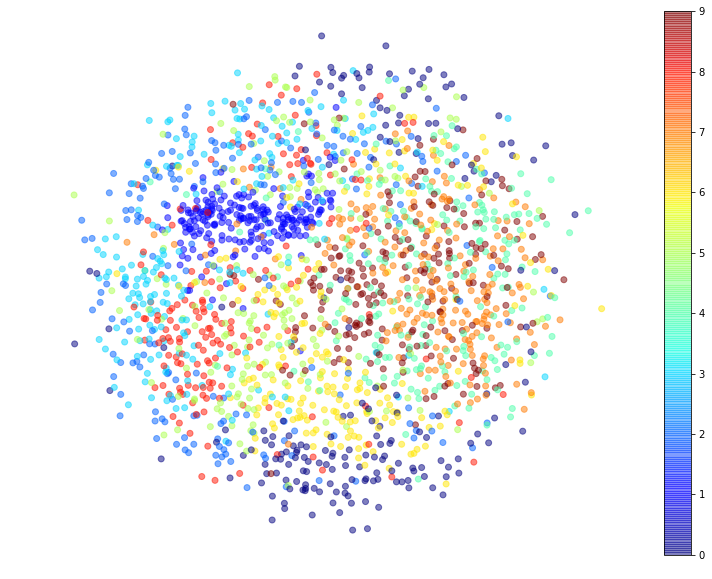

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
X_red = mds.fit_transform(X[:2000], y[:2000])
plt.figure(figsize=(13,10))
plt.scatter(X_red[:, 0], X_red[:, 1], c=y[:2000], alpha=0.5, cmap="jet") 
plt.axis('off') 
plt.colorbar() 
plt.show()